In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 


In [2]:
df1= pd.read_csv('C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/content.csv')
df2= pd.read_csv('C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/relationship.csv')
df3= pd.read_csv('C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/user.csv')

In [3]:
print(df1.shape)
df1["release_date"] = pd.to_datetime(df1["release_date"])
df1.head()

(48645, 9)


,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10


In [4]:
print(df2.shape)
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

(1654450, 6)


,user_id,content_id,duration,date,start_time,end_time
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,06:19:13,06:51:13
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,19:58:14,20:16:14
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,01:52:51,01:55:51
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,06:34:14,06:58:14
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,16:57:19,17:13:19


In [5]:
df2["start_time"] = pd.to_datetime(df2["start_time"], errors='coerce')
df2["end_time"] = pd.to_datetime(df2["end_time"], errors='coerce')

In [6]:
df2['start_time'] = df2['start_time'].dt.hour + df2['start_time'].dt.minute/60 + df2['start_time'].dt.second/3600
df2['end_time'] = df2['end_time'].dt.hour + df2['end_time'].dt.minute/60 + df2['end_time'].dt.second/3600

In [7]:
df2['Time']=df2['end_time']-df2['start_time']
del df2['start_time']
del df2['end_time']
df2.head()

,user_id,content_id,duration,date,Time
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,0.533333
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,0.300000
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,0.050000
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,0.400000
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,0.266667


In [8]:
print(df3.shape)
df3["joining_date"] = pd.to_datetime(df3["joining_date"])
df3.head()

(13843, 5)


,user_id,user_age,gender,location,joining_date
0,user_45028@domain.com,40,M,Goa,2018-06-18
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17
2,user_44289@domain.com,38,F,Goa,2018-09-03
3,user_23708@domain.com,47,F,West Bengal,2020-11-15
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06


In [9]:
df4 = pd.merge(df2,df1, on = 'content_id', how ="left")
print(df4.shape)
df4.head()

(1654450, 13)


,user_id,content_id,duration_x,date,Time,content_type,language,genre,duration_y,release_date,rating,episode_count,season_count
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,0.533333,series,hindi,drama,2880000,2012-04-23,6,7,16
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,0.300000,sports,english,basketball,3240000,2010-04-02,0,3,1
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,0.050000,series,english,action,2880000,1992-12-18,9,26,2
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,0.400000,series,tamil,drama,4980000,2000-08-04,7,7,18
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,0.266667,series,hindi,comedy,4500000,2011-01-15,8,27,9


In [10]:
df4['length'] = df4['episode_count']*df4['season_count']
del df4['season_count']
del df4['episode_count']
df4.head()

,user_id,content_id,duration_x,date,Time,content_type,language,genre,duration_y,release_date,rating,length
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,0.533333,series,hindi,drama,2880000,2012-04-23,6,112
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,0.300000,sports,english,basketball,3240000,2010-04-02,0,3
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,0.050000,series,english,action,2880000,1992-12-18,9,52
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,0.400000,series,tamil,drama,4980000,2000-08-04,7,126
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,0.266667,series,hindi,comedy,4500000,2011-01-15,8,243


C:\Users\DEVU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='count'>

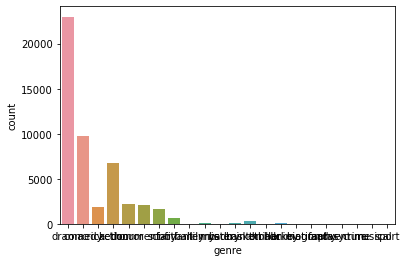

In [11]:
sns.countplot(df1['genre'])

In [12]:
df = pd.merge(df4,df3, on = 'user_id', how ="left")
print(df.shape)
df.head()

(1654450, 16)


,user_id,content_id,duration_x,date,Time,content_type,language,genre,duration_y,release_date,rating,length,user_age,gender,location,joining_date
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,0.533333,series,hindi,drama,2880000,2012-04-23,6,112,59,F,Tripura,2018-11-21
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,0.300000,sports,english,basketball,3240000,2010-04-02,0,3,50,M,Karnataka,2018-01-13
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,0.050000,series,english,action,2880000,1992-12-18,9,52,60,F,Maharashtra,2020-04-02
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,0.400000,series,tamil,drama,4980000,2000-08-04,7,126,46,M,Tamil Nadu,2018-03-31
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,0.266667,series,hindi,comedy,4500000,2011-01-15,8,243,35,F,Maharashtra,2019-11-14


In [13]:
df = pd.get_dummies(df, prefix = ['content_type','language','genre','gender','location'], columns = ['content_type','language','genre','gender','location'])

In [14]:
df.head()

,user_id,content_id,duration_x,date,Time,duration_y,release_date,rating,length,user_age,...,location_Odisa,location_Punjab,location_Rajasthan,location_Sikkim,location_Tamil Nadu,location_Telangana,location_Tripura,location_Uttar Pradesh,location_Uttarakhand,location_West Bengal
0,user_44902@domain.com,cont_1718_16_7,1920000,2020-06-17,0.533333,2880000,2012-04-23,6,112,59,...,0,0,0,0,0,0,1,0,0,0
1,user_87018@domain.com,cont_825_1_3,1080000,2019-12-06,0.300000,3240000,2010-04-02,0,3,50,...,0,0,0,0,0,0,0,0,0,0
2,user_53430@domain.com,cont_1981_2_26,180000,2020-07-27,0.050000,2880000,1992-12-18,9,52,60,...,0,0,0,0,0,0,0,0,0,0
3,user_53696@domain.com,cont_1072_18_7,1440000,2021-08-24,0.400000,4980000,2000-08-04,7,126,46,...,0,0,0,0,1,0,0,0,0,0
4,user_80251@domain.com,cont_760_9_27,960000,2020-06-15,0.266667,4500000,2011-01-15,8,243,35,...,0,0,0,0,0,0,0,0,0,0


In [15]:

# # df2['start_time'] = df2['start_time'].dt.hour + df2['start_time'].dt.minute/60 + df2['start_time'].dt.second/3600
df['date'] = df['date'].dt.year*10000 + df['date'].dt.month*100 + df['date'].dt.day
df['release_date'] = df['release_date'].dt.year*10000 + df['release_date'].dt.month*100 + df['release_date'].dt.day
df['joining_date'] = df['joining_date'].dt.year*10000 + df['joining_date'].dt.month*100 + df['joining_date'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654450 entries, 0 to 1654449
Data columns (total 79 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   user_id                     1654450 non-null  object 
 1   content_id                  1654450 non-null  object 
 2   duration_x                  1654450 non-null  int64  
 3   date                        1654450 non-null  int64  
 4   Time                        1654450 non-null  float64
 5   duration_y                  1654450 non-null  int64  
 6   release_date                1654450 non-null  int64  
 7   rating                      1654450 non-null  int64  
 8   length                      1654450 non-null  int64  
 9   user_age                    1654450 non-null  int64  
 10  joining_date                1654450 non-null  int64  
 11  content_type_movies         1654450 non-null  uint8  
 12  content_type_series         1654450 non-null  uint8  
 1

In [16]:
X = df.iloc[:,2:77].values
# Y = df.iloc[:,0:1]
# x.head()

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X = sc.fit_transform(X)


In [18]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

X = pca.fit_transform(X)


explained_variance = pca.explained_variance_ratio_


In [19]:
X

array([[-1.04304263],
       [ 5.81332786],
       [-0.40189777],
       ...,
       [-0.43638748],
       [-1.07204513],
       [ 0.2643308 ]])

In [20]:
Y = df.iloc[:,0:2]

In [21]:
print(Y.shape)
Y.head()

(1654450, 2)


,user_id,content_id
0,user_44902@domain.com,cont_1718_16_7
1,user_87018@domain.com,cont_825_1_3
2,user_53430@domain.com,cont_1981_2_26
3,user_53696@domain.com,cont_1072_18_7
4,user_80251@domain.com,cont_760_9_27


In [22]:
Z= pd.DataFrame(X)
print(Z.shape)
Z.head()

(1654450, 1)


,0
0,-1.043043
1,5.813328
2,-0.401898
3,-0.540504
4,-0.697363


In [1]:
# Z['tmp'] = 1
# Y['tmp'] = 1
# a = pd.merge(Y,Z, on = 'tmp')
# a = pd.drop('tmp', axis =1)
# a.head()

In [25]:
Y

,user_id,content_id,tmp
0,user_44902@domain.com,cont_1718_16_7,1
1,user_87018@domain.com,cont_825_1_3,1
2,user_53430@domain.com,cont_1981_2_26,1
3,user_53696@domain.com,cont_1072_18_7,1
4,user_80251@domain.com,cont_760_9_27,1
...,...,...,...
1654445,user_62890@domain.com,cont_3832_2_5,1
1654446,user_92034@domain.com,cont_4168_4_5,1
1654447,user_44476@domain.com,cont_1780_7_17,1
1654448,user_73736@domain.com,cont_3432_4_6,1


In [28]:
Z.to_csv("C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/output.csv")
Y.to_csv("C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/outputs.csv")

In [7]:
final = pd.read_csv("C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/outputs.csv")

In [8]:
final.head()

,user_id,content_id,Unnamed: 2,Rating,Unnamed: 4,id
0,user_44902@domain.com,cont_1718_16_7,NaN,-1.043043,NaN,44902
1,user_87018@domain.com,cont_825_1_3,NaN,5.813328,NaN,87018
2,user_53430@domain.com,cont_1981_2_26,NaN,-0.401898,NaN,53430
3,user_53696@domain.com,cont_1072_18_7,NaN,-0.540504,NaN,53696
4,user_80251@domain.com,cont_760_9_27,NaN,-0.697363,NaN,80251


In [9]:
del final['Unnamed: 2']
del final['Unnamed: 4']
del final['user_id']

In [10]:
final.head()


,content_id,Rating,id
0,cont_1718_16_7,-1.043043,44902
1,cont_825_1_3,5.813328,87018
2,cont_1981_2_26,-0.401898,53430
3,cont_1072_18_7,-0.540504,53696
4,cont_760_9_27,-0.697363,80251


In [7]:
# # def x(a):
# #     b=a.split("_")
# #     c=b[1].split("@")
# #     d = int(c[0])
# #     return d
# for i in range (0,1048574):
#     b = final.user_id[i].split("_")
#     c=b[1].split("@")
#     d = int(c[0])
#     final.user_id[i] = d
#     i =i+1
# final.info()

In [11]:
movie_features_df=final.pivot_table(index='content_id',columns='id',values='Rating').fillna(0)
movie_features_df.head()

id,8,15,16,40,54,61,69,80,82,98,...,99916,99922,99928,99931,99943,99961,99962,99971,99972,99974
content_id,,,,,,,,,,,,,,,,,,,,,
cont_1000_1_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cont_1000_1_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cont_1000_1_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cont_1000_1_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cont_1000_2_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
movie_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10867 entries, 8 to 99974
Columns: 44223 entries, cont_1000_1_10 to cont_9_1_8
dtypes: float64(44223)
memory usage: 3.6 GB


In [12]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model = model_knn.fit(movie_features_df_matrix)

In [15]:
query_index = np.random.choice(movie_features_df.shape[1])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)

3312


In [16]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for cont_1287_12_24:

1: cont_2956_2_6, with distance of 0.8475264937720289:
2: cont_4170_12_33, with distance of 0.8518395873828011:
3: cont_3294_4_35, with distance of 0.8633830631073058:
4: cont_944_28_17, with distance of 0.8648031813876845:
5: cont_2700_2_22, with distance of 0.8664984997011628:
6: cont_266_5_1, with distance of 0.8673737007862885:
7: cont_1981_5_12, with distance of 0.8698330652522981:
8: cont_372_2_7, with distance of 0.8767006686151777:
9: cont_4375_4_8, with distance of 0.8782670373737423:
10: cont_3470_1_10, with distance of 0.8791938260143075:


In [17]:
test = pd.read_csv('C:/Users/DEVU/Downloads/94485c06a06911ec/dataset/testa.csv')

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        1440 non-null   object
 1   id          1440 non-null   int64 
 2   Unnamed: 2  1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [19]:
test.head()

,user,id,Unnamed: 2
0,user,18085,domain.com
1,user,16044,domain.com
2,user,13110,domain.com
3,user,18909,domain.com
4,user,15509,domain.com


In [22]:
# del test['user']
# del test['Unnamed: 2']
test.head()

,id
0,18085
1,16044
2,13110
3,18909
4,15509


In [4]:
# mode.kneighbors(test.id,n_neighbors = 11)